In [1]:
# Data Exploration

In [2]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv', encoding='latin1')
test_df = pd.read_csv('test.csv', encoding='latin1')
test_manual_df = pd.read_csv('testdata.manual.2009.06.14.csv', encoding='latin1')
train_noemoticon_df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1')

# Explore the datasets
print(train_df.info())
print(train_df.head())
print(test_df.info())
print(test_df.head())
print(test_manual_df.info())
print(test_manual_df.head())
print(train_noemoticon_df.info())
print(train_noemoticon_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullyi

In [3]:
# Data Preprocessing

In [4]:
# Inspect the column names of each DataFrame
print("Test Dataset Columns:")
print(test_df.columns)
print("\nTrain Dataset Columns:")
print(train_df.columns)
print("\nTest Manual Dataset Columns:")
print(test_manual_df.columns)
print("\nTrain No Emoticon Dataset Columns:")
print(train_noemoticon_df.columns)

Test Dataset Columns:
Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

Train Dataset Columns:
Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

Test Manual Dataset Columns:
Index(['4', '3', 'Mon May 11 03:17:40 UTC 2009', 'kindle2', 'tpryan',
       '@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'],
      dtype='object')

Train No Emoticon Dataset Columns:
Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')


In [6]:
# Exploring Data Analysis

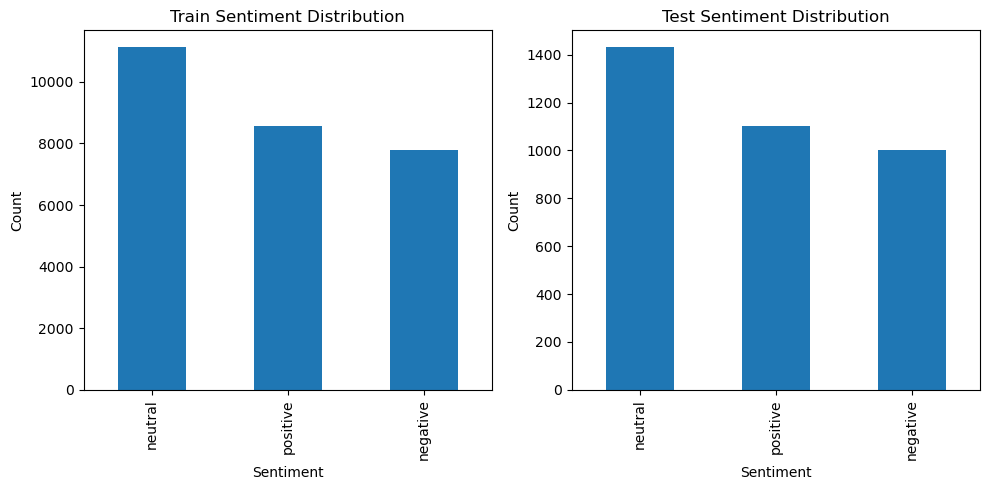

In [15]:
import matplotlib.pyplot as plt

# Distribution of sentiment labels
train_sentiments = train_df['sentiment'].value_counts()
test_sentiments = test_df['sentiment'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_sentiments.plot(kind='bar')
plt.title('Train Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_sentiments.plot(kind='bar')
plt.title('Test Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [8]:
# Text Vextorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['cleaned_text']).toarray()
X_test = vectorizer.transform(test_df['cleaned_text']).toarray()
y_train = train_df['sentiment']
y_test = test_df['sentiment']


In [10]:
# Model Selection

In [17]:
print("Data type of y_train:", type(y_train))
print("Data type of y_test:", type(y_test))

print("Unique values of y_train:", y_train.unique())
print("Unique values of y_test:", y_test.unique())


Data type of y_train: <class 'pandas.core.series.Series'>
Data type of y_test: <class 'pandas.core.series.Series'>
Unique values of y_train: ['neutral' 'negative' 'positive']
Unique values of y_test: ['neutral' 'positive' 'negative' nan]


In [21]:
# Drop rows with NaN values in y_test
y_test = y_test.dropna()
X_train = X_train.tolist()



In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Concatenate the list of strings into a single string
X_train_concatenated = ' '.join(X_train)
X_test_concatenated = ' '.join(X_test)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform([X_train_concatenated])
X_test_tfidf = tfidf_vectorizer.transform([X_test_concatenated])


# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Fit the model on the TF-IDF transformed training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the TF-IDF transformed test data
nb_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))


TypeError: sequence item 0: expected str instance, list found

In [28]:
from sklearn.svm import SVC

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Support Vector Machine Model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))


AttributeError: 'list' object has no attribute 'lower'

In [ ]:
# HyperParameter Tuning

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df['cleaned_text'], train_df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
nb_pred = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
